<a href="https://colab.research.google.com/github/ferperess/Projeto_de_Transfer_Learning_DIO/blob/main/transferlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import os

#if using Theano with GPU
#os.environ["KERAS_BACKEND"] = "tensorflow"

import random
import numpy as np
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from PIL import Image

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

In [ ]:
!pip install opencv-python

In [ ]:
from google.colab import files
import zipfile

# Fazer upload do arquivo
uploaded = files.upload()

# Verificar o nome do arquivo enviado
zip_file_path = list(uploaded.keys())[0]  # Pega o nome do primeiro arquivo enviado

print(f'User uploaded file "{zip_file_path}" with length {len(uploaded[zip_file_path])} bytes.')

# Criar uma pasta para descompactar
extract_folder = '/content/instrumentos'
os.makedirs(extract_folder, exist_ok=True)

# Descompactar o arquivo
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Dataset extraído na pasta: {extract_folder}")


Saving instrumentos.zip to instrumentos (5).zip
User uploaded file "instrumentos (5).zip" with length 17710569 bytes.
Dataset extraído na pasta: /content/instrumentos


In [ ]:
root = 'instrumentos'
train_split, val_split = 0.7, 0.15

exclude = ['instrumentos']

categories = [x[0] for x in os.walk(root) if x[0]][1:]
categories = [c for c in categories if c not in [os.path.join(root, e) for e in exclude]]

print(categories)

['instrumentos/instrumentos/Violao', 'instrumentos/instrumentos/Guitarra']


In [ ]:
def get_image(path):
    img = Image.open(path).convert('RGB')
    print(f"Formato da imagem original: {img.format}, Modo: {img.mode}, Tamanho: {img.size}")

    img = img.resize((224, 224))

    x = np.array(img)
    print(f"Formato do array NumPy: {x.shape}")

    x = preprocess_input(x)
    print(f"Formato do array NumPy depois do preprocess_input: {x.shape}") # Movido para cá

    return img, x

In [ ]:
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames
              in os.walk(category) for f in filenames
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images:
        img, x = get_image(img_path)
        data.append({'x': x[0] if len(x.shape) > 3 else x, 'y': c}) # Armazenar x[0] para remover a dimensão extra

# count the number of classes
num_classes = len(categories)

Formato da imagem original: None, Modo: RGB, Tamanho: (1200, 1200)
Formato do array NumPy: (224, 224, 3)
Formato do array NumPy depois do preprocess_input: (224, 224, 3)
Formato da imagem original: None, Modo: RGB, Tamanho: (225, 225)
Formato do array NumPy: (224, 224, 3)
Formato do array NumPy depois do preprocess_input: (224, 224, 3)
Formato da imagem original: None, Modo: RGB, Tamanho: (700, 700)
Formato do array NumPy: (224, 224, 3)
Formato do array NumPy depois do preprocess_input: (224, 224, 3)
Formato da imagem original: None, Modo: RGB, Tamanho: (225, 225)
Formato do array NumPy: (224, 224, 3)
Formato do array NumPy depois do preprocess_input: (224, 224, 3)
Formato da imagem original: None, Modo: RGB, Tamanho: (225, 225)
Formato do array NumPy: (224, 224, 3)
Formato do array NumPy depois do preprocess_input: (224, 224, 3)
Formato da imagem original: None, Modo: RGB, Tamanho: (225, 225)
Formato do array NumPy: (224, 224, 3)
Formato do array NumPy depois do preprocess_input: (224

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Formato do array NumPy: (224, 224, 3)
Formato do array NumPy depois do preprocess_input: (224, 224, 3)
Formato da imagem original: None, Modo: RGB, Tamanho: (248, 449)
Formato do array NumPy: (224, 224, 3)
Formato do array NumPy depois do preprocess_input: (224, 224, 3)
Formato da imagem original: None, Modo: RGB, Tamanho: (156, 323)
Formato do array NumPy: (224, 224, 3)
Formato do array NumPy depois do preprocess_input: (224, 224, 3)
Formato da imagem original: None, Modo: RGB, Tamanho: (800, 800)
Formato do array NumPy: (224, 224, 3)
Formato do array NumPy depois do preprocess_input: (224, 224, 3)
Formato da imagem original: None, Modo: RGB, Tamanho: (980, 980)
Formato do array NumPy: (224, 224, 3)
Formato do array NumPy depois do preprocess_input: (224, 224, 3)
Formato da imagem original: None, Modo: RGB, Tamanho: (800, 800)
Formato do array NumPy: (224, 224, 3)
Formato do array NumPy depois do preprocess_input: (224, 224, 3)
Formato da imagem original: None, Modo: RGB, Tamanho: (12

In [ ]:
random.shuffle(data)

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(251, 224, 4)
(55, 224, 4)
(54, 224, 4)


In [ ]:
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

In [ ]:
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1]


In [ ]:
# normalize data
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(54, 2)


In [ ]:
# summary
print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)

finished loading 360 images from 2 categories
train / validation / test split: 251, 55, 54
training data shape:  (251, 224, 224, 3)
training labels shape:  (251, 2)


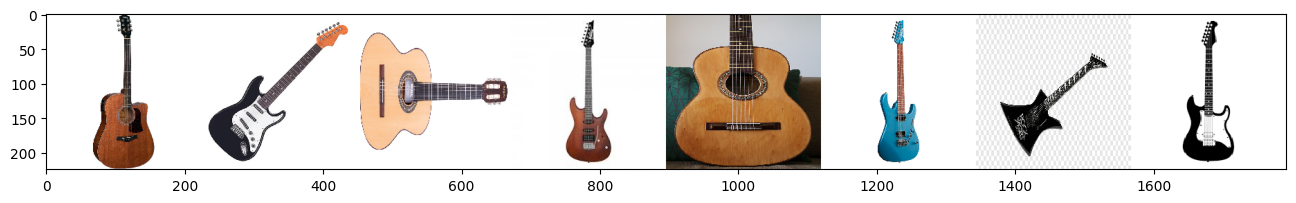

In [ ]:
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

In [ ]:
# build the network
model = Sequential()

# Input layer
model.add(keras.Input(shape=x_train.shape[1:]))  # Define input shape using Input layer

# 1st Convolutional Layer with padding='same'
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer with padding='same'
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))  #padding='same'))

model.add(Dropout(0.25))

# 3rd Convolutional Layer with padding='same'
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2))) # removido

# 4th Convolutional Layer with padding='same'
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2))) # removido

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))  # Add activation function to Dense layer

model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 112, 112, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 56, 56, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 56, 56, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,719,522 (98.11 MB)

 Trainable params: 25,719,522 (98.11 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the model to use categorical cross-entropy loss function and adadelta optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',  # Changed to adadelta
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(x_val, y_val))

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 38s 20s/step - accuracy: 0.5041 - loss: 0.6964 - val_accuracy: 0.5636 - val_loss: 0.6902
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 34s 13s/step - accuracy: 0.5171 - loss: 0.7000 - val_accuracy: 0.5636 - val_loss: 0.6895
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 39s 12s/step - accuracy: 0.5592 - loss: 0.6993 - val_accuracy: 0.5636 - val_loss: 0.6895
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 40s 13s/step - accuracy: 0.5174 - loss: 0.6968 - val_accuracy: 0.5636 - val_loss: 0.6894
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 40s 12s/step - accuracy: 0.5014 - loss: 0.6974 - val_accuracy: 0.6182 - val_loss: 0.6895
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 12s/step - accuracy: 0.5117 - loss: 0.6950 - val_accuracy: 0.5091 - val_loss: 0.6900
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 23s 12s/step - accuracy: 0.4724 - loss: 0.7085 - val_accuracy: 0.5636 - val_loss: 0.6900
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 48s 16s/step - accuracy: 0.4699 - loss: 0.6983 - val_accuracy: 0.4727 - val_loss: 0.6901


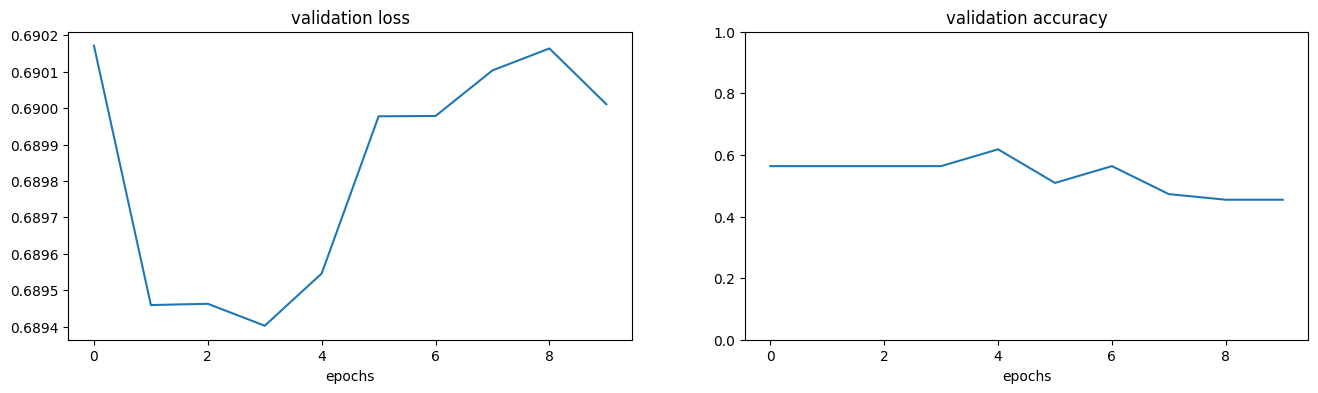

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.6856186985969543
Test accuracy: 0.5925925970077515


In [ ]:
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)

In [ ]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "functional_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 8,194 (32.01 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

In [ ]:
history2 = model_new.fit(x_train, y_train,
                         batch_size=128,
                         epochs=10,
                         validation_data=(x_val, y_val))

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 211s 121s/step - accuracy: 0.4512 - loss: 1.2310 - val_accuracy: 0.5636 - val_loss: 0.8901
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 204s 112s/step - accuracy: 0.5014 - loss: 0.9508 - val_accuracy: 0.4364 - val_loss: 0.8161
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 262s 119s/step - accuracy: 0.5065 - loss: 0.8274 - val_accuracy: 0.4364 - val_loss: 0.8116
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 271s 132s/step - accuracy: 0.5570 - loss: 0.7225 - val_accuracy: 0.6000 - val_loss: 0.6067
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 197s 115s/step - accuracy: 0.5406 - loss: 0.7112 - val_accuracy: 0.5818 - val_loss: 0.6210
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 203s 120s/step - accuracy: 0.5624 - loss: 0.6776 - val_accuracy: 0.7273 - val_loss: 0.5780
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 202s 121s/step - accuracy: 0.6723 - loss: 0.6123 - val_accuracy: 0.4909 - val_loss: 0.6749
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 197s 116s/step - accuracy: 0.5703 - loss: 0.6388 - val_accuracy: 0.8727 - v

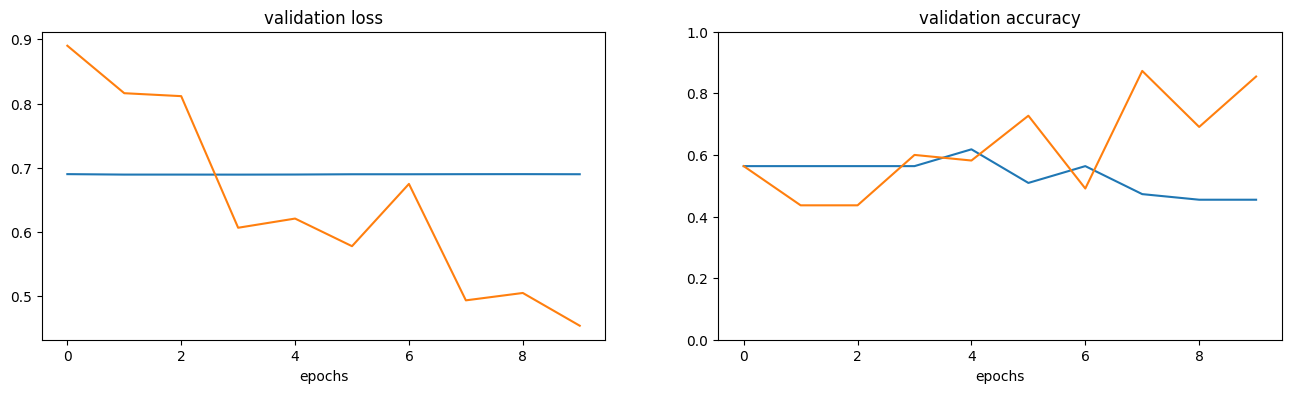

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"]) # Changed "val_acc" to "val_accuracy"
ax2.plot(history2.history["val_accuracy"]) # Changed "val_acc" to "val_accuracy"
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [ ]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.5090219974517822
Test accuracy: 0.7777777910232544
